In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [17]:
#read the data and take sample from it
df = pd.read_csv("D:\logistic_data.csv")
data = df.sample(n = 50000)

data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4465509,324,CASH_IN,111226.34,C1594448509,20168.00,131394.34,C669230220,3664942.40,3553716.07,0,0
6297174,681,TRANSFER,73432.49,C1181141238,0.00,0.00,C808725007,866125.02,939557.51,0,0
1053630,96,PAYMENT,2946.40,C48397813,1837.00,0.00,M725310248,0.00,0.00,0,0
392355,18,PAYMENT,2205.77,C386519057,203867.94,201662.17,M1354167414,0.00,0.00,0,0
4886997,349,TRANSFER,1597450.87,C865066944,0.00,0.00,C555247474,3479322.13,5076773.00,0,0


In [18]:
#to make the data numerical and to (fraud and nofraud)
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,"CASH_IN": 3, "TRANSFER": 4,"DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4465509,324,3,111226.34,C1594448509,20168.00,131394.34,C669230220,3664942.40,3553716.07,No Fraud,0
6297174,681,4,73432.49,C1181141238,0.00,0.00,C808725007,866125.02,939557.51,No Fraud,0
1053630,96,2,2946.40,C48397813,1837.00,0.00,M725310248,0.00,0.00,No Fraud,0
392355,18,2,2205.77,C386519057,203867.94,201662.17,M1354167414,0.00,0.00,No Fraud,0
4886997,349,4,1597450.87,C865066944,0.00,0.00,C555247474,3479322.13,5076773.00,No Fraud,0


In [19]:
#to drop not imp data and assign x and y
data.drop(['nameOrig','nameDest'],axis=1,inplace=True)
X=data.drop('isFraud',axis=1)
y=data['isFraud']


In [20]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4465509,324,3,111226.34,20168.00,131394.34,3664942.40,3553716.07,No Fraud,0
6297174,681,4,73432.49,0.00,0.00,866125.02,939557.51,No Fraud,0
1053630,96,2,2946.40,1837.00,0.00,0.00,0.00,No Fraud,0
392355,18,2,2205.77,203867.94,201662.17,0.00,0.00,No Fraud,0
4886997,349,4,1597450.87,0.00,0.00,3479322.13,5076773.00,No Fraud,0


In [21]:
#dividing the data into 60% training and 20% cv and 20% cv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test_new=np.split(X_test, 2)
Y_cv , Y_test_new=np.split(y_test, 2)

In [22]:
y_train_new=np.zeros(len(y_train))
Y_test_new_1=np.zeros(len(Y_cv))
Y_cv_new=np.zeros(len(Y_cv))
for i in range (len(y_train)):
    if y_train.iloc[i] == 'Fraud':
        y_train_new[i] =1  
y_train_new=pd.DataFrame(y_train_new)
for i in range (len(Y_cv)):
    if Y_cv.iloc[i] == 'Fraud':
        Y_cv_new[i] =1  
for i in range (len(Y_test_new)):
    if Y_test_new.iloc[i] == 'Fraud':
        Y_test_new_1[i] =1


In [23]:
def lOGISTIC (X,y,learningrate, iterations):
        
    y_new = y
    cost_lst = []
    vectorX = generate_Fun(X)
    theta = theta_init(len(X.iloc[0,:]))
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
        cost_lst.append(cost_value)
        
   
    return theta, cost_value

In [24]:
def Regularization_fun(y_pred,y_test,theta):
    cost_reg=100
    best_lamda=0
    lamda=np.array([0,0.02,0.04,0.06,0.10,0.20,0.50,1,5,10,15,20,30])
    cost_lst = []
    m = len(X)
    N = len(y_test)
    for l in range(np.size(lamda)):
        term=(lamda[l]/2*N)*(np.sum(theta**2))
        cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))+term
        cost_lst.append(cost_value)
        if cost_value<cost_reg:
            cost_reg=cost_value
            best_lamda=lamda[l]
    return best_lamda,cost_reg


In [25]:
#to add coloumn of 1 in X features
def theta_init(X):
    theta = np.random.randn(X+1, 1)
    return theta
def generate_Fun(X):#to add coloumn of 1 in X features
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX


def sigmoid_function(X):
    return 1/(1+math.e**(-X))
def MSE(y_pred,y_test):
    cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))
    return cost_value

In [26]:
#Regularization
cost_cv=100
theta1_cv=[]
for j in range(9):
    vectorX=generate_Fun(X_cv.iloc[:,0:j])
    theta2, cost_value1=lOGISTIC(X_train.iloc[:,0:j],y_train_new,0.03, 100)
   
    y_pred = sigmoid_function(vectorX.dot(theta2))#calculate hypothesis using best thetas
    best_lamda,cost_reg=Regularization_fun(y_pred,Y_cv_new,theta2)
    if cost_value1<cost_cv:
        cost_cv=cost_value1
        theta1_cv=theta2
    if cost_reg<cost_cv:
        cost_cv=cost_reg
        theta1_cv=theta2
y_pred_test=sigmoid_function(np.dot(X_test_new.iloc[:,0:np.size(theta1_cv)], theta1_cv))
cost_Y_test=MSE(y_pred_test,Y_test_new_1)
cost_test_reg=MSE(y_pred_test,Y_test_new_1)+(best_lamda/2*len(Y_cv))*(np.sum(theta1_cv**2))

<ipython-input-25-142f2c4012ea>:11: RuntimeWarning: overflow encountered in power
  return 1/(1+math.e**(-X))
<ipython-input-23-eb4af2d1bab5>:12: RuntimeWarning: divide by zero encountered in log
  cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
<ipython-input-24-1eb6b6b4133f>:10: RuntimeWarning: divide by zero encountered in log
  cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))+term
<ipython-input-25-142f2c4012ea>:13: RuntimeWarning: divide by zero encountered in log
  cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))


In [27]:
skfolds = KFold(n_splits=10)
splits = skfolds.split(X, y)
for i, (train_index, test_index) in enumerate(splits):   
  x_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test  = X.iloc[test_index]
  y_test  = y.iloc[test_index]
  clf = LogisticRegression()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = np.mean(y_pred == y_test)
  print(accuracy,'accuracy between y_pred & y_test')

0.997 accuracy between y_pred & y_test
0.9974 accuracy between y_pred & y_test
0.9982 accuracy between y_pred & y_test
0.9978 accuracy between y_pred & y_test
0.9986 accuracy between y_pred & y_test
0.9994 accuracy between y_pred & y_test
0.9998 accuracy between y_pred & y_test
0.9974 accuracy between y_pred & y_test
0.9968 accuracy between y_pred & y_test
0.9964 accuracy between y_pred & y_test


In [28]:
print(sklearn.metrics.confusion_matrix(Y_test_new_1,np.round((y_pred_test))))
print(accuracy_score(Y_test_new_1, np.round((y_pred_test))) )


[[9988    0]
 [  12    0]]
0.9988


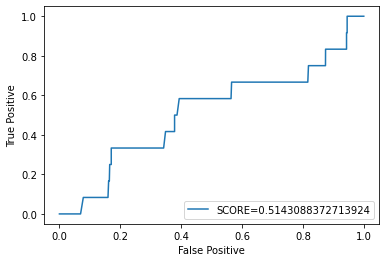

In [29]:
#the curve is the relation between true pos rate and false pos rate
f_pos, t_pos, _ = metrics.roc_curve(Y_test_new_1,  y_pred_test)
score = metrics.roc_auc_score(Y_test_new_1, y_pred_test)


plt.figure()
plt.plot(f_pos,t_pos,label="SCORE="+str(score))

plt.xlabel('False Positive')
plt.ylabel('True Positive')

plt.legend(loc=4)
plt.show()